# MLZilla
By: Rounak Bachwani and Hetvi Gandhi
## Problem Statement
Our work proposes two main methodology, one is a tableau report which provides in detail data analysis on difference of people who are Default(Charged Off) and potential good loan(Current). Another is a Machine Learning model that predicts defaulters which would aid the financial industry to prevent financial loss.

### Importing Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [122]:
df=pd.read_csv('C:\\Users\\Rounak\\Desktop\\OneDrive\\College\\Projects\\Hackathon\\MLZilla\\Playbot_MLZilla\\MLZilla_Case_Data.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,...,Jan-16,0,NaN,INDIVIDUAL,NaN,NaN,0,0,52303,41000
1,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,...,Jan-16,0,79.0,INDIVIDUAL,NaN,NaN,0,332,175731,13100
2,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,Nurse,...,Jan-16,0,NaN,INDIVIDUAL,NaN,NaN,0,0,202012,16300
3,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,...,Jan-16,0,NaN,INDIVIDUAL,NaN,NaN,0,0,108235,34750
4,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,NaN,...,Jan-16,0,69.0,INDIVIDUAL,NaN,NaN,0,0,45492,14100


In [123]:
df.shape

(212999, 49)

In [124]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       12790
emp_length                      12767
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
title                              15
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         103371
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util  

In [125]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
purpose                         object
title                           object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                

## Dropping Columns
- 'id' and 'member_id' was droped because it was unique for each row and hence not useful for analysis
- 'mths_since_last_major_derog' was dropped because it had more than 50% of the data missing
- 'annual_inc_joint' and 'dti_joint' were dropped because they had more than 90% of the data missing
- 'emp_title' was dropped because it had too many unique values
- 'issue_d' was dropped because it was the date of loan issue and that too of 2015 only and hence not useful for analysis
- 'last_credit_pull_d' was dropped because it was the date of last credit pull and that too of 2016 only and hence not useful for analysis
- 'last_pymnt_d' was dropped because it was the date of last payment and that too of 2015-2016 only and hence not useful for analysis
- 'next_pymnt_d' was dropped because it was the date of next payment and hence not useful for analysis

In [126]:
df.drop(['id','member_id', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'emp_title', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d'], axis=1, inplace=True)

- Extracted digits from 'term' column and converted it to int
- extracted year from 'earliest_cr_line' column and converted it to int
- extracted experience years from 'emp_length' column and converted it to int

In [127]:
df['term']=df['term'].str.replace('months','').astype(int)
df['earliest_cr_line']=df['earliest_cr_line'].str.split('-', expand=True)[1].astype(int)
df['emp_length']=df['emp_length'].str.split(' ', expand=True)[0].str.replace('+','').str.replace('<','1').fillna(0).astype(int)

C:\Users\Rounak\AppData\Local\Temp\ipykernel_22440\689754897.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length']=df['emp_length'].str.split(' ', expand=True)[0].str.replace('+','').str.replace('<','1').fillna(0).astype(int)


### Converted all the opjects to category using Label Encoder
- Chose label encoder because few of the columns had more than 3 categories and hence one hot encoding would have increased the number of columns

In [128]:
encoder = LabelEncoder()
df['grade']=encoder.fit_transform(df['grade'])
df['sub_grade']=encoder.fit_transform(df['sub_grade'])
df['home_ownership']=encoder.fit_transform(df['home_ownership'])
df['verification_status']=encoder.fit_transform(df['verification_status'])
df['loan_status']=encoder.fit_transform(df['loan_status'])
df['purpose']=encoder.fit_transform(df['purpose'])
df = df.dropna(subset=['title'])
df['title']=encoder.fit_transform(df['title'])
df['initial_list_status']=encoder.fit_transform(df['initial_list_status'])
df['application_type']=encoder.fit_transform(df['application_type'])
df['term']=encoder.fit_transform(df['term'])

In [129]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,20000,0,12.29,667.06,2,10,1,2,65000.0,...,0.0,0.0,0.0,0.00,0,0,0,0,52303,41000
1,11000,11000,0,12.69,369.00,2,11,7,1,40000.0,...,0.0,0.0,0.0,10059.00,0,0,0,332,175731,13100
2,7000,7000,0,9.99,225.84,1,7,6,1,32000.0,...,0.0,0.0,0.0,225.84,0,0,0,0,202012,16300
3,10000,10000,0,10.99,327.34,1,8,10,1,48000.0,...,0.0,0.0,0.0,327.34,0,0,0,0,108235,34750
4,9550,9550,0,19.99,354.87,4,23,0,3,32376.0,...,0.0,0.0,0.0,354.87,0,0,0,0,45492,14100


### For our personal analysis
- ==> The data also includes, assessing the creditworthness and verifying the income, employment, and assets.
- ==> Purpose of the loan and the amount of the collateral is also considered.
- ==> Once loan is approved, the lender sets the term of the loan, including the interest rate and repayment schedule.
- ==> ML can be used to learn to identify the patterns that predict the liklihood of loan default and also help in evaluating the creditworthiness of the borowwer.

<AxesSubplot:>

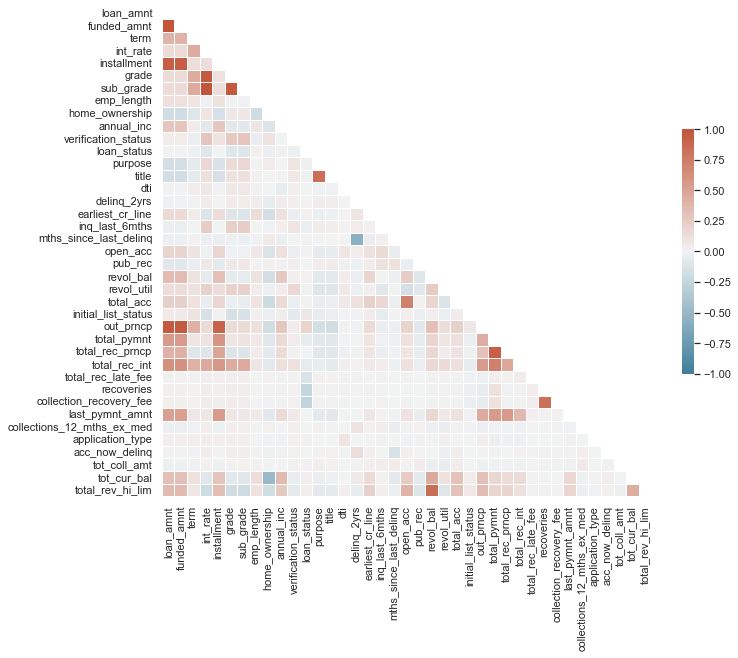

In [130]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### We can deduce from the above headmap that there are few high co-relation between the features

- Calculating the mean and medain helps in understanding the distribution of the data. It also helps in understanding the outliers in the data.
- Moreover, if the mean and median are close to each other, then the data is normally distributed. If the mean is greater than the median, then the data is right skewed and if the mean is less than the median, then the data is left skewed.
- **We can see that the mean and median are close to each other for most of the columns. Hence, we can say that the data is normally distributed and the null values can be replaced by the mean.**

In [131]:
print(df.revol_util.mean())
print(df.revol_util.median())
print(df.revol_util.mode())

53.34358463713523
53.5
0    0.0
Name: revol_util, dtype: float64


In [132]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mean(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

## Performed univariate feature selection methods

- Chi-Square test works only for categorical features
- ANOVA test works only for continuous features
- Therefore we have to perform chi-square test on categorical features and ANOVA test on continuous features

In [133]:
#drop categorical columns
X=df.drop(['loan_status','term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','title','application_type','initial_list_status'],axis=1)
y=df['loan_status']
bestfeatures = SelectKBest(f_classif,k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                      Specs         Score
21  collection_recovery_fee  17044.980745
20               recoveries  14043.197919
15                out_prncp   8429.062384
19       total_rec_late_fee   3666.252728
2                  int_rate   2362.106596
18            total_rec_int    753.724660
16              total_pymnt    594.960135
8            inq_last_6mths    238.467732
26              tot_cur_bal     89.461511
27         total_rev_hi_lim     82.579964
13               revol_util     45.129445
7          earliest_cr_line     31.015608
4                annual_inc     24.129437
12                revol_bal     17.215343
10                 open_acc      9.588235
5                       dti      9.411058
22          last_pymnt_amnt      6.929968
3               installment      6.836520
24           acc_now_delinq      3.687389
25             tot_coll_amt      1.549770


In [134]:
X=df[['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','title','application_type','initial_list_status']]
y=df['loan_status']
bestfeatures = SelectKBest(chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

                 Specs        Score
2            sub_grade  8153.390790
1                grade  1918.354441
9  initial_list_status   312.776809
6              purpose   132.263582
3           emp_length   103.578306
4       home_ownership    74.050944
0                 term    60.956257
5  verification_status    53.725179
7                title    41.025781
8     application_type     5.804263


### After performing uni-variate feature selection, we can see that the following features are important based on the p-value

In [135]:
df=df[['collection_recovery_fee','recoveries','out_prncp','total_rec_late_fee','int_rate','total_rec_int','total_pymnt','inq_last_6mths','sub_grade','loan_status','grade','initial_list_status','purpose','emp_length']]
df.head()

,collection_recovery_fee,recoveries,out_prncp,total_rec_late_fee,int_rate,total_rec_int,total_pymnt,inq_last_6mths,sub_grade,loan_status,grade,initial_list_status,purpose,emp_length
0,0.0,0.0,0.0,0.0,12.29,0.00,0.00,1,10,0,2,1,2,1
1,0.0,0.0,0.0,0.0,12.69,100.81,10043.49,0,11,0,2,1,2,7
2,0.0,0.0,0.0,0.0,9.99,54.40,221.96,1,7,0,1,0,2,6
3,0.0,0.0,0.0,0.0,10.99,79.37,315.13,2,8,0,1,0,1,10
4,0.0,0.0,0.0,0.0,19.99,137.88,333.66,3,23,0,4,1,2,0


<AxesSubplot:>

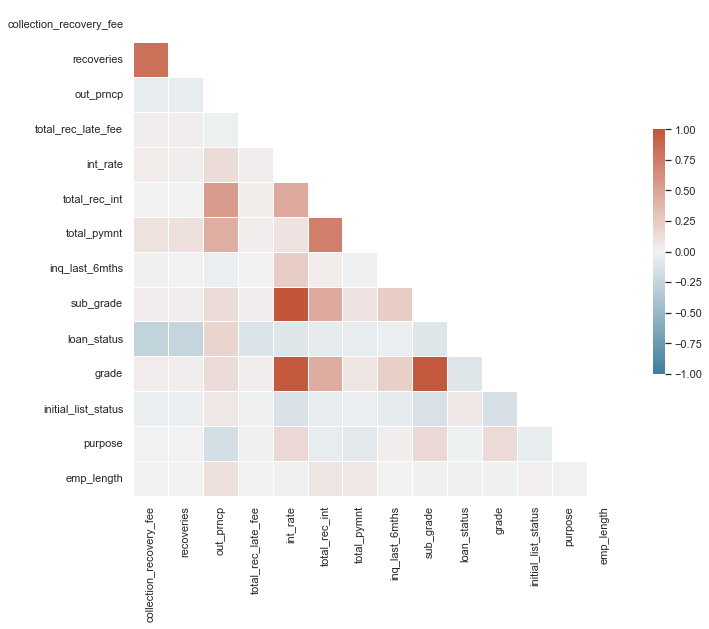

In [136]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Co-relation still exists between the features after performing so we drop a few features based on the co-relation
- 'Grade' was dropped because it was highly co-related with 'sub_grade' and 'sub_grade' basically represents the 'grade' but more detailed.
- One more reason to keep 'sub_grade' is that it has more categories and the score was higher for 'sub_grade' than 'grade'.

In [137]:
df.drop(['grade','int_rate','total_pymnt'], axis=1, inplace=True)

## Imbalanced Data
- 0 is 'Charged Off' and 1 is 'Current'
- We can see that the data is imbalanced. There are more 'Current' loans than 'Charged Off' loans.
- We can use SMOTE to balance the data by generating synthetic data.

In [138]:
df['loan_status'].value_counts()

1    210211
0      2773
Name: loan_status, dtype: int64

In [139]:
df[df['loan_status']==0].sample(10)

,collection_recovery_fee,recoveries,out_prncp,total_rec_late_fee,total_rec_int,inq_last_6mths,sub_grade,loan_status,initial_list_status,purpose,emp_length
1100,0.0000,0.00,0.0,0.0,306.66,0,3,0,1,2,10
179,0.0000,0.00,0.0,0.0,338.79,0,20,0,1,2,5
2150,775.6524,4309.18,0.0,0.0,620.80,0,15,0,0,2,10
371,0.0000,0.00,0.0,0.0,1148.31,2,25,0,0,2,10
2746,0.0000,0.00,0.0,0.0,2402.44,0,26,0,0,2,7
1218,0.0000,0.00,0.0,0.0,601.99,1,24,0,0,8,1
1712,0.0000,0.00,0.0,0.0,1647.94,0,13,0,1,2,8
1073,0.0000,0.00,0.0,0.0,367.89,0,14,0,0,6,4
2320,0.0000,0.00,0.0,0.0,1122.64,1,18,0,0,2,1
1671,0.0000,0.00,0.0,0.0,330.55,0,9,0,1,2,3


In [140]:
df_ChargedOff=df[df['loan_status']==0]
df_ChargedOff.shape

(2773, 11)

### Duplicating the 'Charged Off' data

In [141]:
temp=pd.DataFrame()
for i in range(5):
     temp=pd.concat([temp,pd.concat([df_ChargedOff,df_ChargedOff])])

In [142]:
temp['loan_status'].value_counts()

0    27730
Name: loan_status, dtype: int64

In [143]:
df=pd.concat([df,temp])

In [144]:
df['loan_status'].value_counts()

1    210211
0     30503
Name: loan_status, dtype: int64

### SMOTE
- Oversampling the minority class
- It works by creating synthetic samples from the minor class instead of creating copies.

In [145]:
smote=SMOTE(sampling_strategy='not majority')

In [146]:
df_x=df.iloc[:,:-1]

In [147]:
df_y=df['loan_status']

In [148]:
X_sm,Y_sm=smote.fit_resample(df_x, df_y)

In [149]:
Y_sm.value_counts()

0    210211
1    210211
Name: loan_status, dtype: int64

## Splliting the data into train and test
- We have used 80% of the data for training and 20% of the data for testing

In [150]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.8, random_state=42)

In [151]:
# shape of train and test sets
print(X_train.shape)
print(X_test.shape)

(84084, 10)
(336338, 10)


## Fitting the model
### Random Forest Classifier

In [152]:
# fit model no training data
model = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [153]:
# check the accuracy on the training set and test set
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [154]:
# classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168289
           1       1.00      1.00      1.00    168049

    accuracy                           1.00    336338
   macro avg       1.00      1.00      1.00    336338
weighted avg       1.00      1.00      1.00    336338



Text(30.5, 0.5, 'Actual')

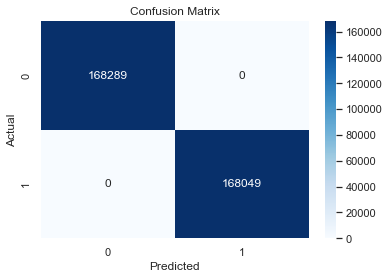

In [155]:
# confusion matrix in graphical form
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Achieved a really good score on both train and test data
### XGBoost Classifier

In [156]:
# xg boost fit
from xgboost import XGBClassifier as XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [157]:
# check the accuracy on the training set and test set
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Text(30.5, 0.5, 'Actual')

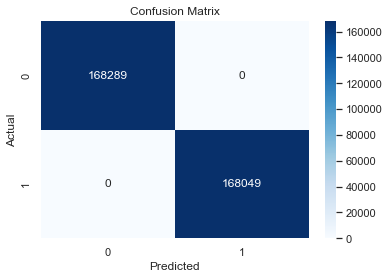

In [158]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Again achieved a really good score on both train and test data